<a href="https://colab.research.google.com/github/Yanyayayaya/cpython/blob/main/Biofilm_XGBoost_Classification_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

dataFile ='/content/drive/MyDrive/Soil Microbiome/csv/csv_01122023_new.csv'

In [ ]:
dataset = pd.read_csv(dataFile, header=0)
dataFrame = pd.DataFrame(dataset)
columns = []
for col in dataFrame.columns:
      columns.append(col)
columns = columns[1:]

y = dataFrame['Class']
x = dataFrame.loc[:, dataFrame.columns != 'Class']
x = x.values

In [ ]:
y.unique()

array(['chip 1', 'chip 2', 'chip 3', 'chip 4', 'chip 5', 'chip 6'],
      dtype=object)

In [ ]:
# getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(y)

array(['chip 1', 'chip 2', 'chip 3', 'chip 4', 'chip 5', 'chip 6'],
      dtype='<U6')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score


#init classifier
xgb_cl = xgb.XGBClassifier()

#Fit
xgb_cl.fit(x_train, y_train)

#Predic
preds = xgb_cl.predict(x_test)

#Score
accuracy_score(y_test,preds)

0.8888888888888888

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb_cl

XGBClassifier ()

XGBClassifier()

In [ ]:
param_grid = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
accuracy_threshold = -1

for md in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10):
    for lr in (0.01, 0.05, 0.1, 0.2):
        for gam in (0, 0.1, 0.2, 0.5):
          for rl in (0, 0.5, 1):
            for spw in (1, 3, 5):
              
            #Define SVM parameters
                xgb_cl = xgb.XGBClassifier(max_depth=md, learning_rate=lr, gamma=gam, reg_lambda=rl, scale_pos_weight=spw)
                xgb_cl.fit(x_train, y_train)
                preds = xgb_cl.predict(x_test)
            # Run the classifier for ALL PCs to predict the Test data
                #Fit

                accuracy = accuracy_score(y_test, preds)
                print(md, lr, gam, rl, spw, accuracy)

1 0.01 0 0 1 0.7777777777777778
1 0.01 0 0 3 0.7777777777777778
1 0.01 0 0 5 0.7777777777777778
1 0.01 0 0.5 1 0.7777777777777778
1 0.01 0 0.5 3 0.7777777777777778
1 0.01 0 0.5 5 0.7777777777777778
1 0.01 0 1 1 0.7777777777777778
1 0.01 0 1 3 0.7777777777777778
1 0.01 0 1 5 0.7777777777777778
1 0.01 0.1 0 1 0.7777777777777778
1 0.01 0.1 0 3 0.7777777777777778
1 0.01 0.1 0 5 0.7777777777777778
1 0.01 0.1 0.5 1 0.7777777777777778
1 0.01 0.1 0.5 3 0.7777777777777778
1 0.01 0.1 0.5 5 0.7777777777777778
1 0.01 0.1 1 1 0.7777777777777778
1 0.01 0.1 1 3 0.7777777777777778
1 0.01 0.1 1 5 0.7777777777777778
1 0.01 0.2 0 1 0.7777777777777778
1 0.01 0.2 0 3 0.7777777777777778
1 0.01 0.2 0 5 0.7777777777777778
1 0.01 0.2 0.5 1 0.7777777777777778
1 0.01 0.2 0.5 3 0.7777777777777778
1 0.01 0.2 0.5 5 0.7777777777777778
1 0.01 0.2 1 1 0.7777777777777778
1 0.01 0.2 1 3 0.7777777777777778
1 0.01 0.2 1 5 0.7777777777777778
1 0.01 0.5 0 1 0.7777777777777778
1 0.01 0.5 0 3 0.7777777777777778
1 0.01 0.5 0 5

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]}
xgb_cl = xgb.XGBClassifier()

clf = GridSearchCV(xgb_cl, parameters)
clf.fit(x_train, y_train)
GridSearchCV(estimator=xgb.XGBClassifier(),
             param_grid={"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]}
)
sorted(clf.cv_results_.keys())
accuracy = accuracy_score(y_test, preds)
print(md, lr, gam, rl, spw, accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


10 0.2 0.5 1 5 0.8888888888888888


In [ ]:

from xgboost.sklearn import XGBClassifier
xgb_cl

XGBClassifier ()


#init classifier
xgb_cl = xgb.XGBClassifier(md,lr,gamma=gam, reg_lambda=rl, scale_pos_weight=spw)

#Fit
xgb_cl.fit(x_train, y_train)

#Predic
preds = xgb_cl.predict(x_test)

#Score
accuracy_score(y_test,preds)

0.8888888888888888

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_cross=cross_val_score(estimator=xgb_cl,X=x_train,y=y_train,cv=6)
print(accuracy_cross.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=6.
  warnings.warn(


0.7250000000000001


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

      chip 1       0.00      0.00      0.00         0
      chip 2       1.00      1.00      1.00         1
      chip 3       1.00      0.67      0.80         3
      chip 4       1.00      1.00      1.00         1
      chip 5       1.00      1.00      1.00         1
      chip 6       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.83      0.78      0.80         9
weighted avg       1.00      0.89      0.93         9



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


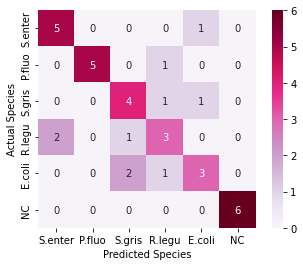

<Figure size 432x288 with 0 Axes>

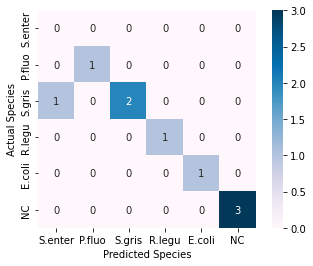

<Figure size 432x288 with 0 Axes>

0.7222222222222222

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

bestModel = XGBClassifier ()
pred = cross_val_predict(bestModel, x, y)
cm1 = confusion_matrix(y, pred)
cm2 = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm1, annot=True, cmap='PuRd', square='True')
ax.set_title('');
ax.set_xlabel('Predicted Species')
ax.set_ylabel('Actual Species');
    
    ## Ticket labels - List must be in alphabetical order
ax.yaxis.set_ticklabels(['S.enter','P.fluo','S.gris','R.legu','E.coli','NC'
       ], fontsize="10")
ax.xaxis.set_ticklabels(['S.enter','P.fluo','S.gris','R.legu','E.coli','NC'
       ], fontsize="10")
plt.figure()
accuracy_score(y_test,preds)
    

    ## Display the visualization of the Confusion Matrix.
plt.show()

ax = sns.heatmap(cm2, annot=True, cmap='PuBu', square='True')
ax.set_title('');
ax.set_xlabel('Predicted Species')
ax.set_ylabel('Actual Species');
    
    ## Ticket labels - List must be in alphabetical order
ax.yaxis.set_ticklabels(['S.enter','P.fluo','S.gris','R.legu','E.coli','NC'
       ], fontsize="10")
ax.xaxis.set_ticklabels(['S.enter','P.fluo','S.gris','R.legu','E.coli','NC'
       ], fontsize="10")
plt.figure()

    

    ## Display the visualization of the Confusion Matrix.
plt.show()
accuracy_score(y,pred)

In [ ]:
preds

array(['Vibrio parahaemolyticus', 'Listeria monocytogenes',
       'Staphylococcus aureus', 'Staphylococcus aureus',
       'Escherichia coli', 'Pseudomonas aeruginosa',
       'Listeria monocytogenes', 'Enterococcus faecium',
       'Listeria monocytogenes', 'Vibrio parahaemolyticus',
       'Salmonella typhimurium', 'Salmonella typhimurium',
       'Salmonella typhimurium', 'Listeria monocytogenes',
       'Vibrio parahaemolyticus', 'Pseudomonas aeruginosa',
       'Bacillus subtilis', 'Salmonella typhimurium',
       'Staphylococcus aureus', 'Pseudomonas aeruginosa',
       'Listeria monocytogenes', 'Bacillus subtilis', 'Bacillus subtilis',
       'Enterococcus faecium', 'Staphylococcus aureus',
       'Bacillus subtilis', 'Legionella pneumophila',
       'Staphylococcus aureus', 'Salmonella typhimurium',
       'Vibrio parahaemolyticus', 'Salmonella typhimurium',
       'Escherichia coli', 'Vibrio parahaemolyticus',
       'Enterococcus faecium', 'Legionella pneumophila',
       'S

In [ ]:
import joblib as joblib
joblib.dump(bestModel, "xgb1.joblib.dat")

['xgb1.joblib.dat']

In [ ]:
loaded_model = joblib.load("xgb1.joblib.dat")

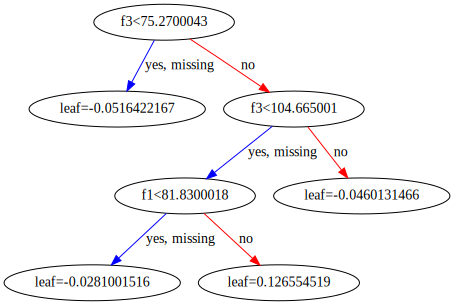

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

# plot single tree
xgb.to_graphviz(xgb_cl, num_trees=66, rankdir='UT')




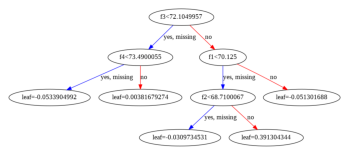

In [ ]:
plot_tree(xgb_cl)

In [ ]:
y_test

117      Campylobacter jejuni
19           Escherichia coli
82     Listeria monocytogenes
97     Listeria monocytogenes
56     Salmonella typhimurium
12           Escherichia coli
132      Campylobacter jejuni
65     Salmonella typhimurium
66     Salmonella typhimurium
18           Escherichia coli
51     Salmonella typhimurium
78     Listeria monocytogenes
94     Listeria monocytogenes
133      Campylobacter jejuni
100    Listeria monocytogenes
64     Salmonella typhimurium
27           Escherichia coli
69     Salmonella typhimurium
125      Campylobacter jejuni
73     Listeria monocytogenes
11           Escherichia coli
119      Campylobacter jejuni
110      Campylobacter jejuni
113      Campylobacter jejuni
55     Salmonella typhimurium
45     Salmonella typhimurium
9            Escherichia coli
4            Escherichia coli
26           Escherichia coli
124      Campylobacter jejuni
31           Escherichia coli
98     Listeria monocytogenes
36     Salmonella typhimurium
16        

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.6 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(xgb_cl.predict_proba, x)
shap_values = explainer.shap_values(x)

  0%|          | 0/320 [00:00<?, ?it/s]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], x, figsize=(1,1))

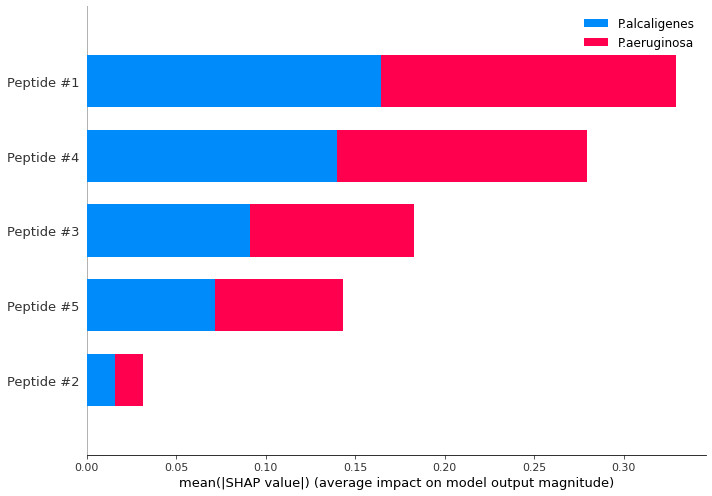

In [ ]:
shap.summary_plot(shap_values, x, plot_type="bar", plot_size=(10,7), color_bar="gray", feature_names=['Peptide #1','Peptide #2','Peptide #3', 'Peptide #4','Peptide #5'], max_display=None, axis_color='#333333', title=None, alpha=1, show=True, sort=True, layered_violin_max_num_bins=20, class_names=[
       'P.aeruginosa', 'P.alcaligenes'
       ]
    )

In [ ]:
# Display plots inline and change default figure size
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
from sklearn.naive_bayes import GaussianNB
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# Train the Gaussian NaiveBayes classifier
clf5 = GaussianNB()
clf5.fit(X, y)
​
# Plot the decision boundary
plot_decision_boundary(lambda x: clf5.predict(x))
plt.title("GaussianNB Classifier")

SyntaxError: ignored

In [ ]:
    combos = list(combinations(columns, 2))
    plt.figure()
    plt.suptitle(
        'Boundary Decision Function Shown in All Dimension Combinations (Scaler Used: {}'.format(dependentNames[bestI])
        )
    for i in range(0, len(combos)):
        print('Running combination: {}'.format(combos[i]))
        try:
            aa, bb = np.meshgrid(
                np.arange(
                    dependent[bestI][:, int(combos[i][0]) - 1].min() - 0.2,
                    dependent[bestI][:, int(combos[i][0]) - 1].max() + 0.2,
                    .1),
                np.arange(
                    dependent[bestI][:, int(combos[i][1]) - 1].min() - 0.2,
                    dependent[bestI][:, int(combos[i][1]) - 1].max() + 0.2, 
                    .1)
                    )
            modelSVM2D = bestModel.fit(
                dependent[bestI][:, [int(combos[i][0]) - 1, int(combos[i][1]) - 1]], y)
            dec = modelSVM2D.predict(np.c_[aa.ravel(), bb.ravel()])
        except MemoryError:
            aa, bb = np.meshgrid(
                np.arange(
                    dependent[bestI][:, int(combos[i][0]) - 1].min() - 0.01, 
                    dependent[bestI][:, int(combos[i][0]) - 1].max() + 0.01, 
                    .01),
                np.arange(
                    dependent[bestI][:, int(combos[i][1]) - 1].min() - 0.01, 
                    dependent[bestI][:, int(combos[i][1]) - 1].max() + 0.01, 
                    .01)
                    )
            modelSVM2D = bestModel.fit(
                dependent[bestI][:, [int(combos[i][0]) - 1, int(combos[i][1]) - 1]], y)
            dec = modelSVM2D.predict(np.c_[aa.ravel(), bb.ravel()])
        if len(combos) == 6:
            plt.subplot(3, 2, i + 1)
        else:
            plt.subplot(7, 3, i + 1)
        plt.subplots_adjust(wspace=0.3, hspace=0.25)
        plt.contourf(aa, bb, dec.reshape(aa.shape),
                    cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(dependent[bestI][:, int(combos[i][0]) - 1], dependent[bestI][:, int(combos[i][1]) - 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Feature {}'.format(combos[i][0]))
        plt.ylabel('Feature {}'.format(combos[i][1]))
        plt.xticks(())
        plt.yticks(())

    plt.show()


NameError: ignored